In [13]:
with open('./data/texts/alice-01.texinfo', 'r') as f:
    ls = f.readlines()
    alice_jb = [l[:-1] for l in ls if l[0] not in ['@', '\n']]
with open('./data/texts/oz8-plain.txt', 'r') as f:
    ls = f.readlines()
    oz_jb = [l[:-1] for l in ls if l[0] not in ['\n']]
    oz_jb = [i.replace('h', "'") for i in oz_jb]
with open('./data/parallel_corpus/train_loj.txt', 'r') as f:
    ls = f.readlines()
    tr_jb = [l[:-1] for l in ls if l[0] not in ['\n']]
with open('./data/parallel_corpus/val_loj.txt', 'r') as f:
    ls = f.readlines()
    val_jb = [l[:-1] for l in ls if l[0] not in ['\n']]
    
import glob
import re
jbs = []
for file in glob.glob('./data/texts/*.jb'):
    with open(file, 'r') as f:
        ls = f.readlines()
        ls = [re.sub('/s/s+', ' ', line) for line in ls]
        jbs.append([l[:-1] for l in ls if l[0] not in ['\n']])

stopwords = "bu fa'o lo'u le'u sa si su zei zo zoi ni'o"
stopwords = stopwords.split(' ')
corpus = [alice_jb, oz_jb] + jbs# + tr_jb + val_jb
corpus2 = [alice_jb, oz_jb] + jbs
corpus = [line.split(' ') for doc in corpus for line in doc]
texts = []
for line in corpus:
    text = []
    for token in line:
        if token not in stopwords:
            text.append(token)
    texts.append(text)

In [2]:
glob.glob('./data/texts/*.jb')

['./data/texts\\5 goods of life.jb',
 './data/texts\\a bunny and a turtle.jb',
 './data/texts\\balkans.jb',
 './data/texts\\book.jb',
 './data/texts\\giving tree.jb',
 './data/texts\\junla zbasu.jb',
 './data/texts\\little prince.jb',
 './data/texts\\nightwalker.jb',
 './data/texts\\red hood.jb',
 './data/texts\\selected enemy.jb',
 './data/texts\\three bears.jb']

In [3]:
import pandas as pd

d = pd.read_excel('dict.xlsx')
cd = pd.read_excel('cdict.xlsx')
cd['translation'] = cd.meaning.str.findall('[^:].*:')
semantic = pd.read_excel('semantic.xlsx')

In [4]:
from gensim.models import Word2Vec, KeyedVectors
from gensim.models.word2vec import Text8Corpus

lr = 0.00004
dim = 50
ws = 5
epoch = 7
minCount = 3
neg = 5
t = 0.001
params = {
    'alpha': lr,
    'size': dim,
    'window': ws,
    'iter': epoch,
    'min_count': minCount,
    'min_alpha': 0.0001,
    'sample': t,
    'sg': 0,
    'hs': 0,
    'negative': neg,
    "seed" : 100
}
gs_model = Word2Vec(corpus, **params)
the_words = "bilma vilcarbrife tedyskepre remna nolninmu retsku ractu nitcu loldi cpanygau canko gugde nixli voikla"
#for the_word in the_words.split(' '):
the_word = 'canko'
sim_words = gs_model.wv.similar_by_word(the_word, 20)
print(the_word)
print(sim_words)
# bilma - to be ill
# zungi - to feel guilt 

# vilcarbrife - huricane
# rokyka'argau - entity is splitting something made of stone into pieces

# ticpre - a trickster

# tedyskepre - Earth scientist
# certu - an expert

# remna - human
# sinma - to respect, to value

# nolninmu - queen
# ractu - rabbit
# banzu - enough
# krorinsa - to curtsey

# retsku - to ask question
# noltru - a noble ruller
# tolfadni - uncommon member of a group

# ractu - rabbit
# tcetcetce - very very very

# nitcu - to depend on
# tinbe - to obey

# loldi - a bottom, ground
# drudi - a top, roof

# cpanygau - to sit/be on top
# korvo - a raven
# volratcu - a flying rat

# canko - a portal
# balvro - a grate doorway

# gugde - a country of people
# bende - a band, a group of people

# nixli - a girl
# rango - a body organ

# voikla - to fly to the destination
# popygau - to be cause of a brake

# la nicte cadzu - walking in night

c:\users\saldern\jupyter\lojban\lojban\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


canko
[('demspa', 0.4174165725708008), ('taliesin', 0.3970678150653839), ('fengu', 0.38812124729156494), ('cfipu', 0.3873538076877594), ('.kuuelalas.', 0.37827959656715393), ('tcaci', 0.3732474148273468), ("pirfi'i", 0.3700536787509918), ('.e', 0.3692990243434906), ('sipna', 0.3610132038593292), ('pensimxu', 0.3309907615184784), ('preja', 0.3260454535484314), ('.em.', 0.32371729612350464), ('.ibo', 0.3225833773612976), ('farlu', 0.3222351670265198), ("ji'a", 0.31908562779426575), ("la'o", 0.31853124499320984), ('cidnyterjorne', 0.3170926570892334), ('klasti', 0.3160172700881958), ("mu'u", 0.315775990486145), ('tolzdi', 0.3157241642475128)]


c:\users\saldern\jupyter\lojban\lojban\lib\site-packages\gensim\matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
print(the_word)
if semantic.loc[semantic.word == the_word, ['semantic1', 'semantic2']].shape[0] > 0:
    print(semantic.loc[semantic.word == the_word, ['semantic1', 'semantic2']])
if cd.loc[cd.word == w[0]].shape[0] > 0:
    print(cd.loc[cd.word == the_word, 'translation'])
if d.loc[d.word == w[0]].shape[0] > 0:
    print(d.loc[d.word == the_word, 'translation'])
print()
for w in sim_words:
    print(w[0])
    if semantic.loc[semantic.word == w[0], ['semantic1', 'semantic2']].shape[0] > 0:
        print(semantic.loc[semantic.word == w[0], ['semantic1', 'semantic2']])
    if cd.loc[cd.word == w[0]].shape[0] > 0:
        print(cd.loc[cd.word == w[0], 'translation'])
    if d.loc[d.word == w[0]].shape[0] > 0:
        print(d.loc[d.word == w[0], 'translation'])
    print()


In [6]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=2)
corpus1 = np.array([gs_model.wv.word_vec(token) for doc in corpus for token in doc if token in gs_model.wv.vocab])
x = pca.fit_transform(corpus1)

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

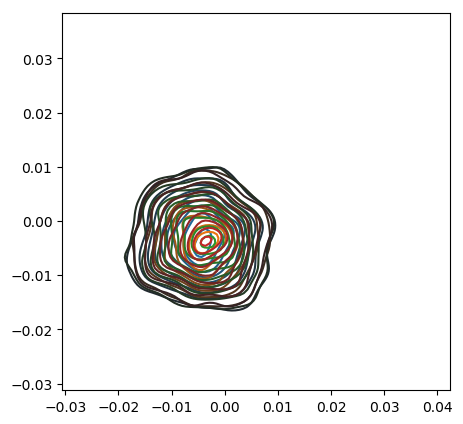

In [28]:
def plt_kde(data):
    return sns.kdeplot(data[:, 0], data[:, 1], ax=ax1, shade=False, shade_lowest=False)

fig, ax1 = plt.subplots(1,1, figsize=(5, 5), dpi=100)

list(map(plt_kde, [alice, oz, lit, night]))

plt.show()

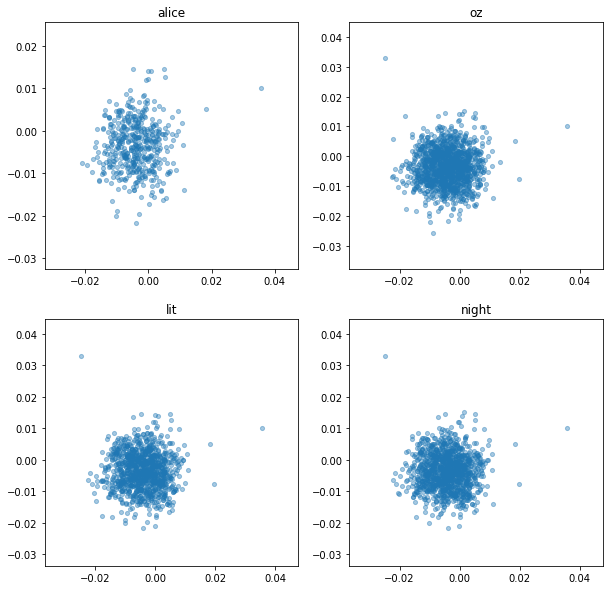

In [36]:
def prep(corpora):
    night = set([j for i in corpora for j in i.split(' ') if j in gs_model.wv.vocab])
    night = [gs_model.wv.word_vec(j) for j in night]
    return pca.transform(night)

alice = prep(corpus2[0])
oz = prep(corpus2[1])
lit = prep(corpus2[8])
night = prep(corpus2[9])

plt.figure(figsize=(10,10))
axs = plt.subplot(221, title="alice")
axs.scatter(alice[:, 0], alice[:, 1], alpha=0.4, s=17)
axs = plt.subplot(222, title="oz")
axs.scatter(oz[:, 0], oz[:, 1], alpha=0.4, s=17)
axs = plt.subplot(223, title="lit")
axs.scatter(lit[:, 0], lit[:, 1], alpha=0.4, s=17)
axs = plt.subplot(224, title="night")
axs.scatter(night[:, 0], night[:, 1], alpha=0.4, s=17) 